In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



Data:

In [3]:
df = pd.read_csv('cars.csv')
df.head()


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,1,781997,881997,10,72310,2,2,16,186,58,194,461803,6
1,2,553464,643464,9,72189,5,6,6,173,81,189,273747,14
2,3,1175130,1275130,10,74100,5,4,14,184,104,95,852711,11
3,4,884824,924824,4,34340,1,7,20,183,125,122,701224,11
4,5,412866,462866,5,48050,1,1,10,189,89,114,213995,3


In [4]:
nulls = np.array(df.isnull().sum())
nulls ### NO Nan VALUES in dataset


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Using KNEIGHBORS REGRESSORS

In [6]:
x = df.drop(columns=['v.id','profit ','buying price']) #creating dataframes 
y = df['buying price']
print(x)
print(y)

      on road old  on road now  years    km   rating  condition  economy  \
0          781997       881997     10  72310       2          2       16   
1          553464       643464      9  72189       5          6        6   
2         1175130      1275130     10  74100       5          4       14   
3          884824       924824      4  34340       1          7       20   
4          412866       462866      5  48050       1          1       10   
...           ...          ...    ...    ...     ...        ...      ...   
1995      1155546      1235546      8  66920       3          4       14   
1996       715901       755901      4  39692       3          1       17   
1997      1147919      1247919     10  79010       4         10        7   
1998       873650       903650      3  26190       1          9       19   
1999       755730       825730      7  67697       2          8       19   

      top speed   hp  torque  
0           186   58     194  
1           173   81     

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y)    # splitting the data into training and testing 
print (x_train)
print (x_test)
print (y_train)
print (y_test)


      on road old  on road now  years    km   rating  condition  economy  \
11        1103430      1133430      3  22689       3          5       13   
776       1165899      1265899     10  94240       5          6       19   
1699       374512       424512      5  45875       1          3       17   
1251       954661      1004661      5  42685       4         10       18   
376        314997       344997      3  28866       4          2        7   
...           ...          ...    ...    ...     ...        ...      ...   
1100       807486       837486      3  22545       2          4       15   
593       1061114      1151114      9  69651       2          2        8   
1068       607953       707953     10  70050       1          4        7   
563        837455       937455     10  81310       4          1       20   
552        497095       577095      8  68168       5          1       11   

      top speed   hp  torque  
11          149  100     199  
776         170  100     

In [9]:
# Preprocessing-Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
print(x_train)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
print(x_test)

             0         1         2         3     4         5         6  \
0     0.892721  0.835656  0.222222  0.168458  0.50  0.444444  0.500000   
1     0.962218  0.970426  1.000000  0.938345  1.00  0.555556  0.928571   
2     0.081792  0.114425  0.444444  0.417939  0.00  0.222222  0.785714   
3     0.727214  0.704650  0.444444  0.383615  0.75  1.000000  0.857143   
4     0.015581  0.033528  0.222222  0.234923  0.75  0.111111  0.071429   
...        ...       ...       ...       ...   ...       ...       ...   
1495  0.563480  0.534572  0.222222  0.166909  0.25  0.333333  0.642857   
1496  0.845644  0.853647  0.888889  0.673768  0.25  0.111111  0.142857   
1497  0.341497  0.402789  1.000000  0.678061  0.00  0.333333  0.071429   
1498  0.596821  0.636277  1.000000  0.799219  0.75  0.000000  1.000000   
1499  0.218167  0.269658  0.777778  0.657811  1.00  0.000000  0.357143   

             7         8         9  
0     0.150000  0.555556  0.991667  
1     0.500000  0.555556  0.141667  


In [21]:
# error rate for different K-values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    print(f'R2_Score: {r2_score(y_test,result)}')
    

RMSE value for k=  1 is: 103513.45507629431
R2_Score: 0.9394846243595452
RMSE value for k=  2 is: 80321.02207082837
R2_Score: 0.9394846243595452
RMSE value for k=  3 is: 71203.9142944403
R2_Score: 0.9394846243595452
RMSE value for k=  4 is: 69609.26000141971
R2_Score: 0.9394846243595452
RMSE value for k=  5 is: 67766.35536059587
R2_Score: 0.9394846243595452
RMSE value for k=  6 is: 67591.89492220778
R2_Score: 0.9394846243595452
RMSE value for k=  7 is: 66190.94696751489
R2_Score: 0.9394846243595452
RMSE value for k=  8 is: 65828.98229942184
R2_Score: 0.9394846243595452
RMSE value for k=  9 is: 65919.08680597453
R2_Score: 0.9394846243595452
RMSE value for k=  10 is: 65975.0429008441
R2_Score: 0.9394846243595452
RMSE value for k=  11 is: 66545.78294380184
R2_Score: 0.9394846243595452
RMSE value for k=  12 is: 66785.27673897821
R2_Score: 0.9394846243595452
RMSE value for k=  13 is: 67597.69032829563
R2_Score: 0.9394846243595452
RMSE value for k=  14 is: 67585.74117783165
R2_Score: 0.93948

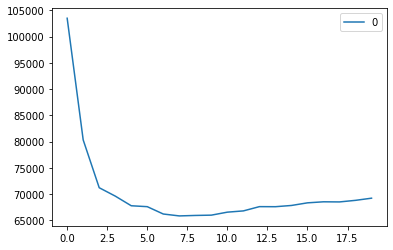

In [11]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Now from graph and above output k=7 has been decided.

Predictions on the test dataset-:


In [16]:
test=pd.read_csv('test.csv')
test.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,884463,934463,5,37235,1,10,6,152,115,156
1,2,358375,448375,9,71532,5,3,8,171,70,95
2,3,925561,955561,3,21276,2,10,11,188,67,118
3,4,1190067,1210067,2,17766,3,2,14,174,97,155
4,5,419517,479517,6,49626,5,2,14,192,91,184


In [17]:
test = test.drop(columns=['v.id'])
print(test.head())
results=model.predict(test)

   on road old  on road now  years    km   rating  condition  economy  \
0       884463       934463      5  37235       1         10        6   
1       358375       448375      9  71532       5          3        8   
2       925561       955561      3  21276       2         10       11   
3      1190067      1210067      2  17766       3          2       14   
4       419517       479517      6  49626       5          2       14   

   top speed   hp  torque  
0        152  115     156  
1        171   70      95  
2        188   67     118  
3        174   97     155  
4        192   91     184  


In [18]:
test['buying price'] = results
test['buying price'] = test['buying price'].astype(int)

In [19]:
test['v.id'] = [x for x in range(1,len(test)+1)]
test.head()


,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,v.id
0,884463,934463,5,37235,1,10,6,152,115,156,897214,1
1,358375,448375,9,71532,5,3,8,171,70,95,886204,2
2,925561,955561,3,21276,2,10,11,188,67,118,897214,3
3,1190067,1210067,2,17766,3,2,14,174,97,155,904357,4
4,419517,479517,6,49626,5,2,14,192,91,184,889589,5


In [22]:
test = test[['v.id','buying price']]
test.set_index('v.id',inplace=True)
test.to_csv('answers.csv')